# Malaria Disease Detection

## Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
tf.__version__

'2.0.0'

In [3]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers import Flatten
from keras.models import Sequential 

## Data Visualization

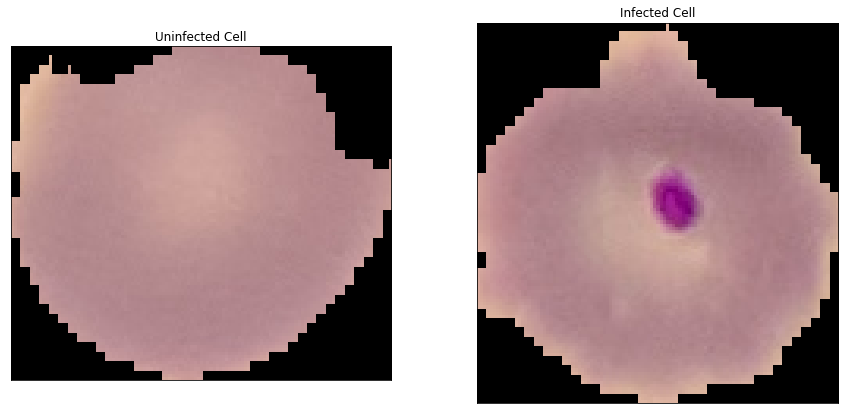

In [4]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

upic = np.array(Image.open('malaria/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png'))
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(upic)
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

apic = np.array(Image.open('malaria/cell_images/Parasitized/C33P1thinF_IMG_20150619_121229a_cell_177.png'))
plt.subplot(1 , 2 , 2)
plt.imshow(apic)
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()


## Preprocessing the Data

In [5]:
datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

### Preprocessing the Training set

In [6]:
train_datagen = datagen.flow_from_directory('malaria/cell_images', 
                                                 target_size = (128, 128), 
                                                 batch_size = 16, 
                                                 class_mode = 'binary',
                                           subset = 'training')

Found 22048 images belonging to 2 classes.


### Preprocessing the Validation set

In [7]:
validate_datagen = datagen.flow_from_directory('malaria/cell_images',
                                              target_size = (128,128),
                                               batch_size = 16,
                                               class_mode = 'binary',
                                               subset = 'validation')

Found 5510 images belonging to 2 classes.


## Building the CNN model

In [8]:
cnn = Sequential()

#### First Convolutional Layer

In [9]:
cnn.add(Conv2D(input_shape = [128, 128, 3], kernel_size = 5, filters = 16, activation = 'relu'))

#### First pooling layer

In [10]:
cnn.add(MaxPooling2D(pool_size = 2))

In [11]:
cnn.add(Dropout(0.2))

#### Second convolutional and pooling layers

In [12]:
cnn.add(Conv2D(kernel_size = 3, filters = 32, activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = 2))
cnn.add(Dropout(0.3))

#### Third convolutional and pooling layers

In [13]:
cnn.add(Conv2D(kernel_size = 3, filters = 64, activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = 2))
cnn.add(Dropout(0.3))

#### Fourth convolutional and pooling layers

In [14]:
cnn.add(Conv2D(kernel_size = 1, filters = 128, activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = 2))
cnn.add(Dropout(0.4))

#### Flattening

In [15]:
cnn.add(Flatten())

#### First Dense layer

In [16]:
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.5))

#### Output layer with sigmoid activation function

In [17]:
cnn.add(Dense(units = 1, activation = 'sigmoid'))

## Training the CNN

### Compiling the CNN Model

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Evaluating on validation data

In [19]:
cnn.fit(x = train_datagen, validation_data = validate_datagen, epochs = 25)

Epoch 1/25
1378/1378 [==============================] - 817s 593ms/step - loss: 0.4978 - accuracy: 0.7466 - val_loss: 0.2449 - val_accuracy: 0.9316
Epoch 2/25
1378/1378 [==============================] - 583s 423ms/step - loss: 0.1753 - accuracy: 0.9448 - val_loss: 0.1684 - val_accuracy: 0.9323
Epoch 3/25
1378/1378 [==============================] - 587s 426ms/step - loss: 0.1578 - accuracy: 0.9516 - val_loss: 0.0291 - val_accuracy: 0.9452
Epoch 4/25
1378/1378 [==============================] - 585s 425ms/step - loss: 0.1538 - accuracy: 0.9534 - val_loss: 0.0885 - val_accuracy: 0.9343
Epoch 5/25
1378/1378 [==============================] - 583s 423ms/step - loss: 0.1486 - accuracy: 0.9548 - val_loss: 0.0232 - val_accuracy: 0.9423
Epoch 6/25
1378/1378 [==============================] - 598s 434ms/step - loss: 0.1410 - accuracy: 0.9572 - val_loss: 0.0322 - val_accuracy: 0.9397
Epoch 7/25
1378/1378 [==============================] - 456s 331ms/step - loss: 0.1408 - accuracy: 0.9577 - val_

In [22]:
cnn.summary()
scores = cnn.evaluate(validate_datagen, verbose=1)
print("Efficiency: %2.f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)       